# 신뢰구간
표본에서 얻은 정보를 기반으로 모집단의 특성을 추정하는 방법 중 하나

모주에 대한 추정값의 범위를 제공하여 추정의 불확실성을 나타냄

신뢰구간은 주어진 신뢰수준에 따라 모수가 존재할 것으로 예상되는 범위를 나타낸다. 예를 들어 95%신뢰구간은 모수가 95%확률로 해당구간에 속할 것으로 추정함

신뢰구간은 일반적으로 표본크기, 추정방법, 데이터의 변동성 등과 같은 요소에 따라 달라질 수 있으며 정확한 신뢰구가능ㄹ 구하기 위해서는 통계학적인 가정과 계산방법을 사용해야한다. 
 > 결국은 내가 확실히 말할 수 있는 정도 라는 의미

## 파이선으로 신뢰구간 구하기
scipy.stats 패키지의 t 객체가 포함하는 interval(신뢰도, 자유도, loc=샘플평균, scale=샘플표준오차) 메서드를 사용한다.


신뢰도	95%, 90% 등을 0~1 범위 안에서 설정

자유도	통계 모델의 매개변수나 관측치들이 얼마나 자유롭게 변할 수 있는지를 나타내는 값

일반적으로 전체데이터수-1

샘플평균	데이터들의 평균값

샘플표준오차	데이터들의 표준오차 -> 표준편차/샘플크기
## #01. 작업준비
### 패키지 참조

`scipy` 패키지의 설치가 필요하다.
### 데이터 가져오기

In [2]:
import pandas as pd 
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sb    
import sys

In [3]:
df = pd.read_excel("https://data.hossam.kr/E02/insur.xlsx")
df

,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150
2,2,3,2,36,8.0,120
3,3,4,2,38,12.0,140
4,1,1,1,45,10.0,150
5,2,2,1,48,2.5,200
6,3,3,2,50,9.0,90
7,3,3,1,53,7.5,180
8,2,2,1,49,5.5,250
9,3,4,1,55,25.0,300


## #02. 신뢰구간 구하기
### 신뢰수준

In [4]:
clevel = 0.95

### 샘플사이즈 

In [5]:
n = len(df)
n

30

### 자유도 (dof)

In [10]:
dof = n-1

### 표본평균

In [7]:
sample_mean = df['가입금액'].mean()


### 표본표준편차

파이썬에서는 표준편차를 계산할 때, 옵션으로 ddof 라는 것을 사용한다. 위의 코드에서 ddof = 1은 표준편차를 계산할 때, n-1로 나누라는 의미다

In [18]:
sample_std = df['가입금액'].std(ddof=1)
sample_std

8.131678510756489

### 표본 표준오차

표준편차/샘플크기**0.5

In [9]:
import math
sample_std_error = sample_std/math.sqrt(n)

### 신뢰구간


In [12]:
cmin,cmax = t.interval(clevel,dof,loc=sample_mean,scale=sample_std_error)
cmin,cmax

(8.746914675272894, 14.819751991393773)

In [15]:
df['가입금액'].max()

33.0

## #03. 시각화

In [16]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

<Axes: xlabel='가입금액', ylabel='Density'>

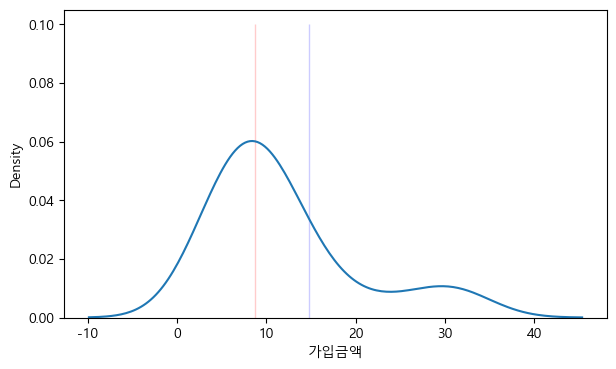

In [19]:
sb.kdeplot(data=df,x='가입금액')
sb.lineplot(x=[cmin,cmin],y=[0,0.1],color='red')
sb.lineplot(x=[cmax,cmax],y=[0,0.1],color='blue')